<a href="https://colab.research.google.com/github/Rizwanali324/ML_projects/blob/main/Dog_race_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Example.csv")

In [ ]:
df.sample(5)

,Dog name,Deta of run,track name,race distance,race grade,Trap,Finish,SecRTG,RTG
2832,GLENGAR FOREST,28/07/2023,Oxf,450m,A5,6,3,86,63
1967,CROSSFIELD ZELDA,07/08/2023,Mon,480m,A5,6,2,98,87
1189,KEREIGHT SARAH,02/08/2023,Yar,462m,A3,5,6,83,87
2124,CRUYFF TURN,04/08/2023,Mon,480m,A9,4,3,72,58
1715,CAROLS CLOWN,28/08/2023,Suf,388m,A2,3,1,74,79


In [ ]:
df.keys()

Index(['Dog name', 'Deta of run', 'track name', 'race distance', 'race grade',
       'Trap', 'Finish', 'SecRTG', 'RTG'],
      dtype='object')

Dataset Description
Dog name - name of the dog
Date of run - the date the meeting was ran
track name - The short name of the track
race distance - The distance of the race in metres
race grade - The grade/class of this race
Trap - The trap this greyhound ran from
Fin - The position of this greyhound in this race
SecRTG - Rating based on greyhound´s sectional perfomance in this race
RTG - master rating based on greyhound´s recent and overall perfomance

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dog name       2886 non-null   object
 1   Deta of run    2886 non-null   object
 2   track name     2886 non-null   object
 3   race distance  2886 non-null   object
 4   race grade     2886 non-null   object
 5   Trap           2886 non-null   int64 
 6   Finish         2886 non-null   int64 
 7   SecRTG         2886 non-null   object
 8   RTG            2886 non-null   object
dtypes: int64(2), object(7)
memory usage: 203.0+ KB


In [ ]:
df.isnull().sum()

Dog name         0
Deta of run      0
track name       0
race distance    0
race grade       0
Trap             0
Finish           0
SecRTG           0
RTG              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:

# Assuming df is your DataFrame
df.rename(columns={'Deta of run': 'Date of run'}, inplace=True)


In [ ]:
df['Date of run'] = pd.to_datetime(df['Date of run'])
df.sample(5)

<ipython-input-67-08e75c27e2c0>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Dog name,Date of run,track name,race distance,race grade,Trap,Finish,SecRTG,RTG
1204,STONEPARK BIRD,2023-07-26,Yar,462m,A5,2,3,79,85
672,KILLURE LANDY,2023-03-08,She,500m,A6,5,3,93,57
1377,GLENGAR BOBBLE,2023-07-31,Not,500m,A2,4,2,66,92
675,TRUBBYS FIELD,2023-06-28,She,500m,A7,6,4,49,54
1393,BELLMORE LOLA,2023-08-17,Not,500m,A1,5,1,109,119


In [ ]:
# Assuming you have a DataFrame named df
df['race distance'] = df['race distance'].str.replace('m', '').astype(int)
df.sample(5)

,Dog name,Date of run,track name,race distance,race grade,Trap,Finish,SecRTG,RTG
811,SCARTY PIRANHA,2023-08-21,Kin,462,A8,6,1,78,59
2777,WESSEX CLARE,2023-08-15,Oxf,450,A7,4,2,101,58
1736,MONTORE JIMMY,2023-08-21,Suf,388,A2,2,5,50,43
1671,SAVANA THAT MAN,2023-08-22,Suf,388,A6,4,1,46,55
452,MENDIP DAVE,2023-07-29,Swi,476,A9,1,3,33,49


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Dog name       2886 non-null   object        
 1   Date of run    2886 non-null   datetime64[ns]
 2   track name     2886 non-null   object        
 3   race distance  2886 non-null   int64         
 4   race grade     2886 non-null   object        
 5   Trap           2886 non-null   int64         
 6   Finish         2886 non-null   int64         
 7   SecRTG         2886 non-null   object        
 8   RTG            2886 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 203.0+ KB


In [ ]:

# Assuming df is your DataFrame
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f'Unique values in {column}:')
    print(values)
    print()


Unique values in Dog name:
['STORYS PICTURE' 'PORTHALL TANDON' 'BAD HABITS' 'CREE DREAM'
 'DIEGOS DUCHESS' 'CREEVY CHANCE' 'SHORTWOOD SUN' 'GO GO JO'
 'PORTHALL BIKER' 'FLYHIGH LABOCA' 'SWIFT UMIKA' 'RATCHIES SAPHIRE'
 'DROOPYS CHEESY' 'KYERO SLIM' 'ON THE TAIL' 'ROSSHILL ROCCO' 'TOKEN RULE'
 'ROSIE DE WINTER' 'CACTUS SANDY' 'MARRY ME JULIET' 'DARING KEVIN'
 'SHORTWOOD BURPEE' 'FINAL MERCURY' 'BRICKEY HERO' 'GENEVA ORLA'
 'FRANKTON WILLO' 'MAIN EVENT' 'FLYHIGH BARNY' 'WESTVIEW DIOR'
 'PERALS DREAM' 'BERTHAS ACE' 'CHUBBYS MINAJ' 'KILBREEDY JANE'
 'ROSSTEMPLE PATTY' 'ABIGAILS AMIGO' 'SHORTWOOD SIRIUS' 'DANESRATH ANGEL'
 'BAGGIOS STORM' 'FLYHIGH PEBBLES' 'BRAMBLE SHADOW' 'BLAZEAWAY GEORGI'
 'NATIVE RUMBLE' 'CHARLIES CHOICE' 'PORTHALL PAT' 'CORPORATE NEWS'
 'LILYWHITE BEAUTY' 'CREEVY FIRE' 'STOP THAT DAISY' 'BLAZEAWAY JIGGER'
 'RATHSILLA PUNO' 'BALLARUE FLO' 'RATHSILLA LEIA' 'OLIVETREE PUFFO'
 'HOMEWARD HERO' 'CASTELL NIA' 'CATUNDA STELLA' 'MOHICAN CERYS'
 'COILLBHUI BRENDA' 'VEGAS FLYER' 

In [ ]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df

,Dog name,Date of run,track name,race distance,race grade,Trap,Finish,SecRTG,RTG
0,storys picture,2023-08-24,per,480,a6,1,4,62,38
1,storys picture,2023-08-14,per,480,a6,1,4,80,48
2,storys picture,2023-05-08,per,480,a6,1,3,86,50
3,storys picture,2023-07-25,per,480,a6,1,4,56,48
4,storys picture,2023-07-15,per,480,a6,1,2,80,63
...,...,...,...,...,...,...,...,...,...
2881,canvas bucks,2023-08-28,oxf,450,a7,5,3,94,55
2882,canvas bucks,2023-08-21,oxf,450,a7,4,5,91,47
2883,canvas bucks,2023-12-08,oxf,450,a7,6,3,100,64
2884,canvas bucks,2023-07-08,oxf,450,a8,6,1,100,62


In [ ]:
# Assuming you have a DataFrame named df
df['Day of Week'] = df['Date of run'].dt.day_name()
df['Month'] = df['Date of run'].dt.month_name()
df.sample(5)

,Dog name,Date of run,track name,race distance,race grade,Trap,Finish,SecRTG,RTG,Day of Week,Month
1444,caseys jetsam,2023-08-14,tow,500,a2,2,4,85,77,Monday,August
1693,give it again,2023-08-08,suf,388,a6,2,3,42,46,Tuesday,August
2442,jeopardy dream,2023-08-19,rom,400,a10,3,1,58,72,Saturday,August
2664,savana patrick,2023-08-24,oxf,450,a5,5,1,103,89,Thursday,August
1473,caseys linda,2023-08-14,tow,500,a4,2,5,91,41,Monday,August


In [ ]:
# Assuming you have a DataFrame named df
df.drop('Date of run', axis=1, inplace=True)


In [ ]:
df1=df.copy()

In [ ]:
df1.sample(5)

,Dog name,track name,race distance,race grade,Trap,Finish,SecRTG,RTG,Day of Week,Month
617,black shelby,she,500,a4,2,5,77,81,Tuesday,April
955,freston,yar,462,a2,3,3,85,106,Wednesday,August
30,shortwood sun,per,480,a6,1,5,36,51,Sunday,January
2759,shesacharmer,oxf,450,a8,1,4,86,52,Monday,May
1628,dinky jezabelle,suf,388,a5,2,6,60,-,Tuesday,August


In [ ]:
df1.isnull().sum()

Dog name         0
track name       0
race distance    0
race grade       0
Trap             0
Finish           0
SecRTG           0
RTG              0
Day of Week      0
Month            0
dtype: int64

In [ ]:
df1.duplicated().sum()

1

In [ ]:
# Assuming you have a DataFrame named df
df1.drop_duplicates(inplace=True)


In [ ]:
# Replace '-' with a default value (e.g., 0) and then change the data types of 'SecRTG' and 'RTG' columns to int
df1['SecRTG'] = df1['SecRTG'].replace('-', '0').astype(int)
df1['RTG'] = df1['RTG'].replace('-', '0').astype(int)
df1.sample(5)

,Dog name,track name,race distance,race grade,Trap,Finish,SecRTG,RTG,Day of Week,Month
1204,stonepark bird,yar,462,a5,2,3,79,85,Wednesday,July
786,knotmor best,kin,462,a6,6,4,66,35,Wednesday,August
2434,shakshuka,rom,400,a11,1,3,42,59,Saturday,July
1453,fabulous honey,tow,500,a4,3,2,109,77,Thursday,July
743,tiermana fern,kin,462,a8,2,3,56,21,Friday,July


In [ ]:
df1.keys()

Index(['Dog name', 'track name', 'race distance', 'race grade', 'Trap',
       'Finish', 'SecRTG', 'RTG', 'Day of Week', 'Month'],
      dtype='object')

In [ ]:

# Assuming df is your DataFrame
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f'Unique values in {column}:')
    print(values)
    print()


Unique values in Dog name:
['storys picture' 'porthall tandon' 'bad habits' 'cree dream'
 'diegos duchess' 'creevy chance' 'shortwood sun' 'go go jo'
 'porthall biker' 'flyhigh laboca' 'swift umika' 'ratchies saphire'
 'droopys cheesy' 'kyero slim' 'on the tail' 'rosshill rocco' 'token rule'
 'rosie de winter' 'cactus sandy' 'marry me juliet' 'daring kevin'
 'shortwood burpee' 'final mercury' 'brickey hero' 'geneva orla'
 'frankton willo' 'main event' 'flyhigh barny' 'westview dior'
 'perals dream' 'berthas ace' 'chubbys minaj' 'kilbreedy jane'
 'rosstemple patty' 'abigails amigo' 'shortwood sirius' 'danesrath angel'
 'baggios storm' 'flyhigh pebbles' 'bramble shadow' 'blazeaway georgi'
 'native rumble' 'charlies choice' 'porthall pat' 'corporate news'
 'lilywhite beauty' 'creevy fire' 'stop that daisy' 'blazeaway jigger'
 'rathsilla puno' 'ballarue flo' 'rathsilla leia' 'olivetree puffo'
 'homeward hero' 'castell nia' 'catunda stella' 'mohican cerys'
 'coillbhui brenda' 'vegas flyer' 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 2885
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dog name       2885 non-null   object
 1   track name     2885 non-null   object
 2   race distance  2885 non-null   int64 
 3   race grade     2885 non-null   object
 4   Trap           2885 non-null   int64 
 5   Finish         2885 non-null   int64 
 6   SecRTG         2885 non-null   int64 
 7   RTG            2885 non-null   int64 
 8   Day of Week    2885 non-null   object
 9   Month          2885 non-null   object
dtypes: int64(5), object(5)
memory usage: 247.9+ KB


In [ ]:
df1.isnull().sum()

Dog name         0
track name       0
race distance    0
race grade       0
Trap             0
Finish           0
SecRTG           0
RTG              0
Day of Week      0
Month            0
dtype: int64

In [ ]:

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

# EDA

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define a color palette for the bars
colors = px.colors.qualitative.Set1

# 1. Dog Name - Using Plotly with different colors
dog_name_distribution = df1['Dog name'].value_counts().reset_index()
dog_name_distribution.columns = ['Dog Name', 'Count']
dog_name_distribution = dog_name_distribution.sort_values(by='Count', ascending=False)

fig = px.bar(dog_name_distribution.head(10), x='Dog Name', y='Count',
             title='Top 10 Dog Names', color='Dog Name', color_discrete_sequence=colors)
fig.show()


In [ ]:

# 2. Track Name - Using Plotly with different colors
track_distribution = df1['track name'].value_counts().reset_index()
track_distribution.columns = ['Track Name', 'Number of Races']

fig = px.bar(track_distribution, x='Track Name', y='Number of Races',
             title='Distribution of Races by Track', color='Track Name', color_discrete_sequence=colors)
fig.show()


In [ ]:

# 3. Race Distance - Using Plotly with different colors
race_distance_distribution = df1['race distance'].value_counts().reset_index()
race_distance_distribution.columns = ['Race Distance', 'Count']

fig = px.bar(race_distance_distribution, x='Race Distance', y='Count',
             title='Distribution of Race Distances', color='Race Distance', color_discrete_sequence=colors)
fig.show()


In [ ]:

# 4. Race Grade - Using Plotly with different colors
race_grade_distribution = df1['race grade'].value_counts().reset_index()
race_grade_distribution.columns = ['Race Grade', 'Count']

fig = px.bar(race_grade_distribution, x='Race Grade', y='Count',
             title='Distribution of Race Grades', color='Race Grade', color_discrete_sequence=colors)
fig.show()


In [ ]:

# 5. Trap - Using Plotly with different colors
trap_distribution = df1['Trap'].value_counts().reset_index()
trap_distribution.columns = ['Trap', 'Count']

fig = px.bar(trap_distribution, x='Trap', y='Count',
             title='Distribution of Races by Trap', color='Trap', color_discrete_sequence=colors)
fig.show()


In [ ]:

# 6. Finish - Using Plotly with different colors
finish_distribution = df1['Finish'].value_counts().reset_index()
finish_distribution.columns = ['Finish Position', 'Count']

fig = px.bar(finish_distribution, x='Finish Position', y='Count',
             title='Distribution of Finish Positions', color='Finish Position', color_discrete_sequence=colors)
fig.show()



In [ ]:
# 7. Day of Week - Using Plotly with different colors
day_of_week_distribution = df1['Day of Week'].value_counts().reset_index()
day_of_week_distribution.columns = ['Day of Week', 'Count']

fig = px.bar(day_of_week_distribution, x='Day of Week', y='Count',
             title='Distribution of Races by Day of the Week', color='Day of Week', color_discrete_sequence=colors)
fig.show()




In [ ]:
# 8. Month - Using Plotly with different colors
month_distribution = df1['Month'].value_counts().reset_index()
month_distribution.columns = ['Month', 'Count']

fig = px.bar(month_distribution, x='Month', y='Count',
             title='Distribution of Races by Month', color='Month', color_discrete_sequence=colors)
fig.show()


4    534
2    524
3    519
1    496
5    481
6    328
0      3
Name: Finish, dtype: int64


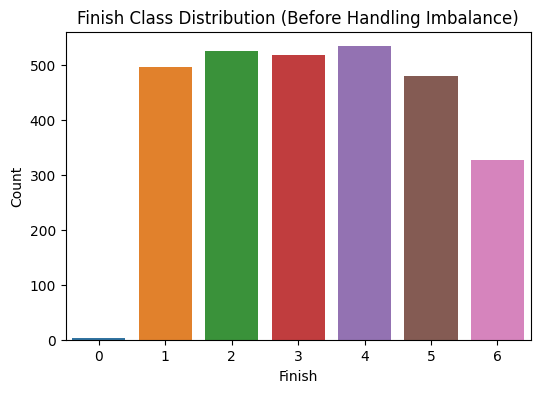

4    534
3    534
2    534
5    534
6    534
1    534
0    534
Name: Finish, dtype: int64


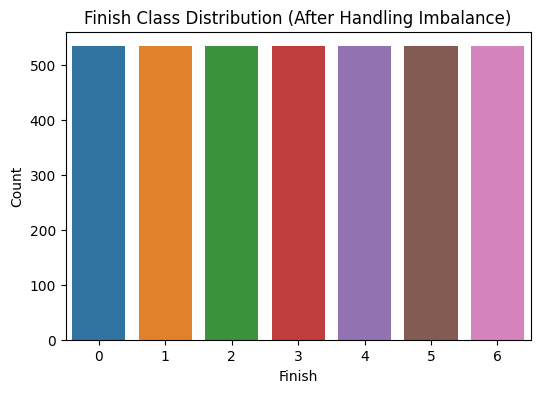

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming you have loaded your dataset into a pandas DataFrame called "df"

# Check the class distribution of "income"
class_distribution = df1['Finish'].value_counts()

# Print the class distribution
print(class_distribution)

# Plot the class distribution before handling imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Finish', data=df)
plt.title('Finish Class Distribution (Before Handling Imbalance)')
plt.xlabel('Finish')
plt.ylabel('Count')
plt.show()

# Handling imbalance using Random Over-Sampling
X = df1.drop('Finish', axis=1)
y = df1['Finish']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df1 = pd.DataFrame(X_resampled, columns=X.columns)
df1['Finish'] = y_resampled

# Check the class distribution after handling imbalance
class_distribution_resampled = df1['Finish'].value_counts()

# Print the class distribution after handling imbalance
print(class_distribution_resampled)

# Plot the class distribution after handling imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Finish', data=df1)
plt.title('Finish Class Distribution (After Handling Imbalance)')
plt.xlabel('Finish')
plt.ylabel('Count')
plt.show()

In [ ]:
df1.sample(5)

,Dog name,track name,race distance,race grade,Trap,SecRTG,RTG,Day of Week,Month,Finish
1017,murlens twingo,yar,462,a3,4,87,96,Monday,May,2
2885,franklins pace,rom,400,a11,1,0,0,Monday,August,0
1084,legsbeavingyou,yar,462,a1,5,79,99,Saturday,July,5
447,confey kid,swi,476,a9,2,29,19,Friday,July,6
2261,stradeen shiraz,rom,400,a3,4,54,77,Tuesday,August,2


In [ ]:
df1.keys()

Index(['Dog name', 'track name', 'race distance', 'race grade', 'Trap',
       'SecRTG', 'RTG', 'Day of Week', 'Month', 'Finish'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder



# Define the columns to be encoded
columns_to_encode = ['race grade', 'Day of Week', 'Month']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
df1[columns_to_encode] = encoder.fit_transform(df1[columns_to_encode])
df1.sample(3)
# Now, the specified columns are encoded with ordinal values.


,Dog name,track name,race distance,race grade,Trap,SecRTG,RTG,Day of Week,Month,Finish
2667,ballyblack bess,oxf,450,6.0,2,98,57,1.0,1.0,4
3348,ballyloo charlie,rom,575,19.0,2,0,0,5.0,1.0,0
826,glencorbry hope,kin,462,8.0,2,81,60,0.0,1.0,1


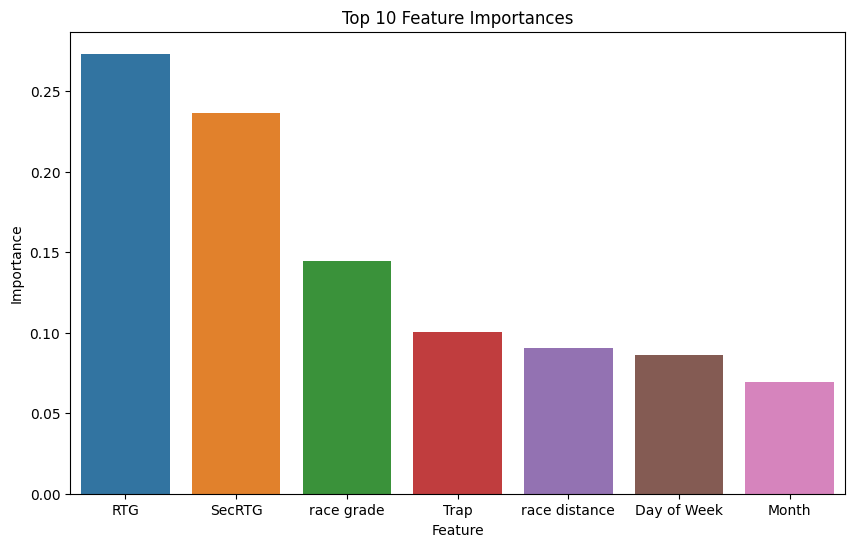

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Exclude 'Dog name' column from features
X = df1.drop(columns=['Finish', 'Dog name','track name'])

# Target variable
y = df1['Finish']

# Build a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X, y)

# Get feature importances from the model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (e.g., top 10) vertically (default behavior)
top_n = 10
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=feature_df.head(top_n), x='Feature', y='Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dog name       3738 non-null   object 
 1   track name     3738 non-null   object 
 2   race distance  3738 non-null   int64  
 3   race grade     3738 non-null   float64
 4   Trap           3738 non-null   int64  
 5   SecRTG         3738 non-null   int64  
 6   RTG            3738 non-null   int64  
 7   Day of Week    3738 non-null   float64
 8   Month          3738 non-null   float64
 9   Finish         3738 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 292.2+ KB


In [ ]:
df1 = pd.get_dummies(df1,drop_first= True)
df1


,race distance,race grade,Trap,SecRTG,RTG,Day of Week,Month,Finish,Dog name_abracadabra,Dog name_adamant sky,...,track name_not,track name_oxf,track name_per,track name_rom,track name_she,track name_suf,track name_sun,track name_swi,track name_tow,track name_yar
0,480,7.0,1,62,38,4.0,1.0,4,0,0,...,0,0,1,0,0,0,0,0,0,0
1,480,7.0,1,80,48,1.0,1.0,4,0,0,...,0,0,1,0,0,0,0,0,0,0
2,480,7.0,1,86,50,1.0,8.0,3,0,0,...,0,0,1,0,0,0,0,0,0,0
3,480,7.0,1,56,48,5.0,5.0,4,0,0,...,0,0,1,0,0,0,0,0,0,0
4,480,7.0,1,80,63,2.0,5.0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,480,6.0,2,64,36,1.0,5.0,6,0,0,...,0,0,1,0,0,0,0,0,0,0
3734,462,6.0,3,65,55,3.0,1.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3735,480,5.0,2,100,81,4.0,1.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3736,480,7.0,1,0,36,3.0,1.0,6,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1.shape

(3738, 707)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your data is in a DataFrame named 'data' and the target column is named 'finish'
# X should contain your features (excluding the 'finish' column)
X = df1.drop('Finish', axis=1)
y = df1['Finish']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
# You can choose the number of principal components (n_components) based on your preference or use explained variance ratio
# Let's say you want to keep 95% of the explained variance
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a Decision Tree classifier to the reduced dataset
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_pca, y_train)

# Calculate the training score (accuracy)
training_score = classifier.score(X_train_pca, y_train)
print("Training Score (Accuracy):", training_score)


classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Score (Accuracy):", accuracy)


Training Score (Accuracy): 0.9996655518394649
Test Score (Accuracy): 0.4425133689839572


In [ ]:
 print(pca.explained_variance_ratio_)

[0.62935628 0.31032762]


In [ ]:
from xgboost import XGBClassifier
# Perform PCA for dimensionality reduction
# You can choose the number of principal components (n_components) based on your preference or use explained variance ratio
# Let's say you want to keep 95% of the explained variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.4304812834224599


In [ ]:
# Fit a Decision Tree classifier to the reduced dataset
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_pca, y_train)

# Access feature importances
feature_importances = classifier.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.2901819  0.39527831 0.31453978]
